# KNN: Iris Dataset

## Scikit-Learn

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('Iris\Iris.csv')
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df
# iris = load_iris()
# print(iris.DESCR)

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.0,3.0,1.6,0.2,Iris-setosa
2,6.2,2.8,4.8,1.8,Iris-virginica
3,6.4,3.1,5.5,1.8,Iris-virginica
4,4.9,2.5,4.5,1.7,Iris-virginica
5,5.4,3.9,1.3,0.4,Iris-setosa
6,5.7,3.8,1.7,0.3,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,6.0,2.2,5.0,1.5,Iris-virginica
9,5.0,3.4,1.5,0.2,Iris-setosa


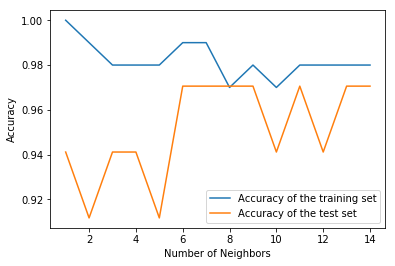

In [6]:
iris_data = df[['sepal_length','sepal_width','petal_length','petal_width']]
iris_target = np.ravel(df[['class']])
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, stratify=iris_target, random_state=66)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)
max_precision = -1

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    y_precision = knn.score(X_test, y_test)
#     if y_precision > max_precision:
#         max_precision = y_precision
    test_accuracy.append(y_precision)
#     print(y_precision)
 

plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
y_pred= knn.predict(X_test)
print(f1_score(y_test, y_pred , average = 'macro'))
print(recall_score(y_test, y_pred , average = 'macro'))

0.9707936507936509
0.9696969696969697


In [8]:
print("Accuracy of the training set for 7NN: {:3f}".format(training_accuracy[6]))
print("Accuracy of the test set for 7NN: {:3f}".format(test_accuracy[6]))

Accuracy of the training set for 7NN: 0.990000
Accuracy of the test set for 7NN: 0.970588


In [9]:
from sklearn.metrics import classification_report
target_names = df['class'].unique()
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00        11
    Iris-setosa       0.92      1.00      0.96        12
Iris-versicolor       1.00      0.91      0.95        11

      micro avg       0.97      0.97      0.97        34
      macro avg       0.97      0.97      0.97        34
   weighted avg       0.97      0.97      0.97        34



## My Implementation

In [13]:
import random
def train_test_split(df,test_size):
    if isinstance(test_size, float):
        test_size = round(test_size*len(df))
    
    indices = df.index.tolist()
    test_indices = random.sample(indices, k=test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df


In [15]:
import math
def euclideanDistance(row1,row2,length):
    dist = 0
    for i in range(0,length):
        dist += (math.pow((row1[i]-row2[i]),2))
    distance = math.sqrt(dist)
    return distance
    

In [16]:
dist1 = [2,2,'a']
dist2 = [3,3,'b']
euclideanDistance(dist1,dist2,len(dist1)-1)

1.4142135623730951

In [24]:
import operator
def getNearestNeighbours(trainSet,testSet,k):
    distances = []
    kNeighbours = []
    length = len(testSet)-1
    for x in range(0,len(trainSet)):
        dist = euclideanDistance(trainSet[x],testSet,length)
        distances.append([trainSet[x],dist])
    distances.sort(key=operator.itemgetter(1))
    for i in range(0,k):
        kNeighbours.append(distances[i][0])
    return kNeighbours

In [25]:
trainSet = [[1,1,'a'],[2,2,'b'],[3,3,'a']]
testSet = [4,4,'a']
getNearestNeighbours(trainSet,testSet,2)

[[3, 3, 'a'], [2, 2, 'b']]

In [120]:
def outcome(kNeighbours):
    responses = {}
    for x in kNeighbours:
        val = x[-1]
#         print(val)
        if val in responses:
            responses[val] += 1
        else:
            responses[val] = 1
#     responses.iteritems()
    sortedOutput = sorted(responses.items(),key=operator.itemgetter(1),reverse=True)
    return sortedOutput[0][0]
#     print(responses.items())
#         output.append([val,responses[val]])
#     responses.sort(key=operator.itemgetter(1))
#     return responses[0][0]

In [121]:
outcome([[3, 3, 'a'], [2, 2, 'b'],[4, 4, 'b']])

'b'

In [216]:
def findAccuracy(testSet,predictedSet):
    label = ['Iris-virginica','Iris-setosa','Iris-versicolor']
    correct = 0
    size = 0
    counter = 0
    tp = [0,0,0]
    fp = [0,0,0]
    tn = [0,0,0]
    fn = [0,0,0]
    for x in testSet:
        orig = predictedSet[counter]
        pred = x[-1]
        counter += 1
        if orig == pred:
            correct += 1
        if orig == 'Iris-virginica':
            if pred == 'Iris-virginica':
                tp[0] += 1
            else:
                fn[0] += 1
        if orig != 'Iris-virginica':
            if pred != 'Iris-virginica':
                tn[0] += 1
            else:
                fp[0] += 1
        if orig == 'Iris-setosa':
            if pred == 'Iris-setosa':
                tp[1] += 1
            else:
                fn[1] += 1
        if orig != 'Iris-setosa':
            if pred != 'Iris-setosa':
                tn[1] += 1
            else:
                fp[1] += 1
        if orig == 'Iris-versicolor':
            if pred == 'Iris-versicolor':
                tp[2] += 1
            else:
                fn[2] += 1
        if orig != 'Iris-versicolor':
            if pred != 'Iris-versicolor':
                tn[2] += 1
            else:
                fp[2] += 1
        size += 1
    for i in range(0,len(label)):
#         print(str(label[i]) + " Details")
        if tp[i]+fn[i]==0:
            recall = float("-inf")
        else:
            recall = tp[i]/(tp[i] + fn[i])
        if tp[i]+fp[i]==0:
            precision = float("-inf")
        else:
            precision = tp[i]/(tp[i] + fp[i])
        if recall + precision <= float("-inf"):
            f1_score = -1
        else:
            f1_score = (2*precision*recall)/(precision + recall)
#         print("Recall: " + str(recall))
#         print("Precision: " + str(precision))
#         print("F1 Score: " + str(f1_score))
    return round(float(correct/size),2)
        

In [217]:
testSet = [[1,1,'a'],[2,2,'b'],[3,3,'a']]
predictedSet = ['a','a','a']
findAccuracy(testSet,predictedSet)

0.67

In [218]:
def knn(trainSet,testSet):
    for k in range(1,15):
        y_predicted = []
#         print(y_predicted)
        for x in testSet:
            kNeighbours = getNearestNeighbours(trainSet,x,k)
            pred_label = outcome(kNeighbours)
            y_predicted.append(pred_label)
#         for i in range(0,len(testSet)):
#             print(y_predicted[i])
#             print(testSet[i][-1])
#             print("====")
        accuracy = findAccuracy(testSet,y_predicted) 
    
        print("Accuracy: " + str(accuracy))
#     for x in range(len(testSet)):
#         print(testSet[x])
#         neighbours = getNearestNeighbours(trainSet,testSet[x],k)
#         result = outcome(neighbours)
#         predictions.append(result)
# #         print(result + "  and " + testSet[x][-1])
#     print(predictions)
#     accuracy = findAccuracy(testSet,y_pred)    
#     print("Accuracy: " + str(accuracy))
        

In [274]:
train_df,test_df = train_test_split(df,0.20)
# print(test_df.shape[0])
# train_df.shape[0]
trainSet = []
testSet = []
for i,row in train_df.iterrows():
    trainSet.append([row['sepal_length'],row['sepal_width'],row['petal_length'],row['petal_width'],row['class']])
for i,row in test_df.iterrows():
    testSet.append([row['sepal_length'],row['sepal_width'],row['petal_length'],row['petal_width'],row['class']])
knn(trainSet,testSet)

Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89


In [258]:
import csv
def loadDataset(filename, split, trainingSet =[], testSet =[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        count = 0
        val = int(random.random())
        for x in range(len(dataset)-1):
            count += 1
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if count <= 107 and val/2 == 0:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [259]:
trainingSet = []
testSet = []
loadDataset('Iris\Iris.csv',0.80,trainingSet,testSet)
print('Train: ' + str(len(trainingSet)))
print('Test: ' + str(len(testSet)))

Train: 107
Test: 27


In [260]:
def main():
    trainingSet = []
    testSet = []
    loadDataset('Iris\Iris.csv',0.80,trainingSet,testSet)
    print('Train: ' + repr(len(trainingSet)))
    print('Test: ' + repr(len(testSet)))
    predictions = []
    for k in range(1,15):
        for x in range(len(testSet)):
            neighbours = getNearestNeighbours(trainingSet, testSet[x] , k)
            result = outcome(neighbours)
            predictions.append(result)
        accuracy = findAccuracy(testSet, predictions)
        print('Accuracy: ' + repr(accuracy))

In [267]:
main()

Train: 107
Test: 27
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
Accuracy: 0.96
